<a href="https://colab.research.google.com/github/wonively523/Hands-On-Meta-Learning-With-Python/blob/master/Assignment05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['ggplot'])

# 1. Plot the training data

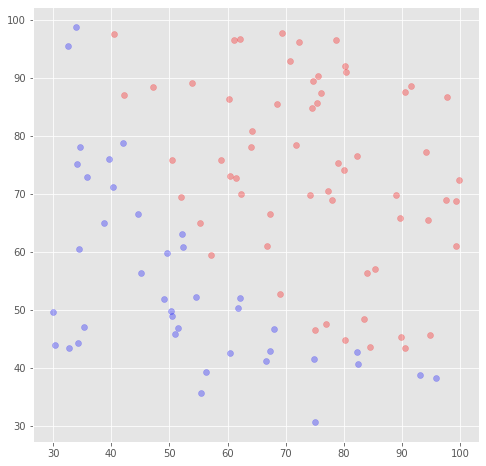

In [133]:
#load the training data from the file and plot the points

data    = np.genfromtxt("/content/gdrive/My Drive/Colab Notebooks/data.txt", delimiter=',')

x       = data[:, 0]
y       = data[:, 1]
label   = data[:, 2]

x_label0    = x[label == 0]
x_label1    = x[label == 1]

y_label0    = y[label == 0]
y_label1    = y[label == 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.show()


In [0]:
def logreg(theta0, theta1, theta2, x, y):
  z = theta0 + np.multiply(theta1,x) + np.multiply(theta2,y)
  sigmoid = 1/(1+np.exp(-z))
  return sigmoid

In [0]:
m=len(x)

def objecfunc(label, sigmoid):
  cost = 1/m*np.sum(-label*np.log(sigmoid)-(1-label)*np.log(1-sigmoid))
  return cost

In [0]:
def gd(lr, theta0, theta1, theta2, label, sigmoid):
  D_theta0 = theta0 - lr*(1/m) * np.sum(sigmoid-label)
  D_theta1 = theta1 - lr*(1/m) * np.sum(np.multiply((sigmoid-label),x))
  D_theta2 = theta2 - lr*(1/m) * np.sum(np.multiply((sigmoid-label),y))
  return D_theta0, D_theta1, D_theta2

In [0]:
def theta_hist(history, cost, theta0, theta1, theta2):
  history['cost'].append(cost)
  history['theta0'].append(theta0)
  history['theta1'].append(theta1)
  history['theta2'].append(theta2)

In [0]:
def params(history):
  plt.figure(figsize=(12, 8))
  
  theta0 = history['theta0']
  theta1 = history['theta1']
  theta2 = history['theta2']

  plt.plot(theta0,'r-')
  plt.plot(theta1,'g-')
  plt.plot(theta2,'b-')
  plt.show()

In [0]:
def error(history):
  plt.figure(figsize=(12, 8))

  cost = history['cost']
  plt.plot(cost,'b-')
  plt.show()

# 2. Plot the estimated parameters

In [0]:
lr = 0.0001

def train(epochs):
  theta0 = -2
  theta1 = -np.random.random(1)
  theta2 = -np.random.random(1)

  for epoch in range(epochs):
    sigmoid = logreg(theta0, theta1, theta2, x, y)
    cost = objecfunc(label,sigmoid)
    theta0, theta1, theta2 = gd(lr,theta0, theta1, theta2 ,label,sigmoid)
    theta_hist(history, cost, theta0, theta1, theta2)
 
train(10000)

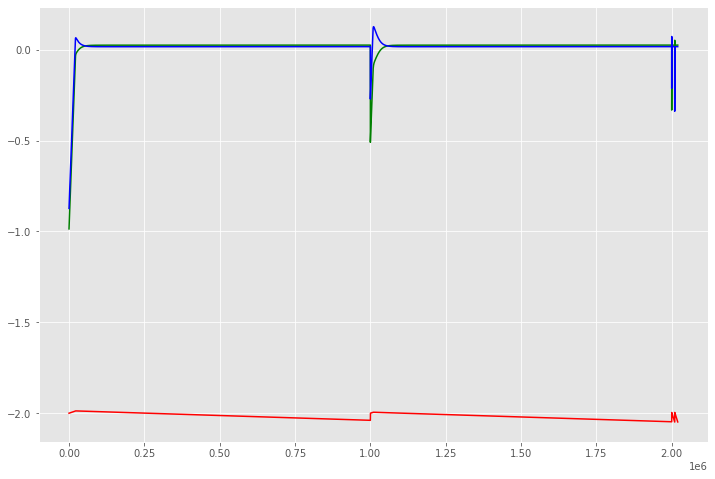

In [141]:
params(history)

# 3. Plot the training error

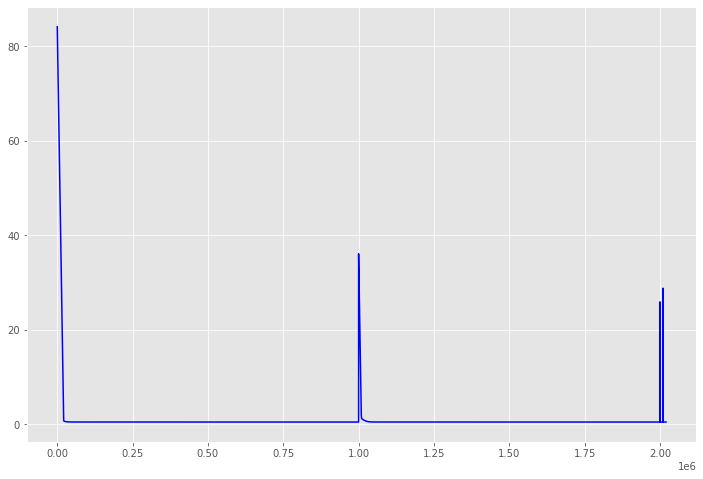

In [142]:
error(history)

# 4. Plot the obtained classifier

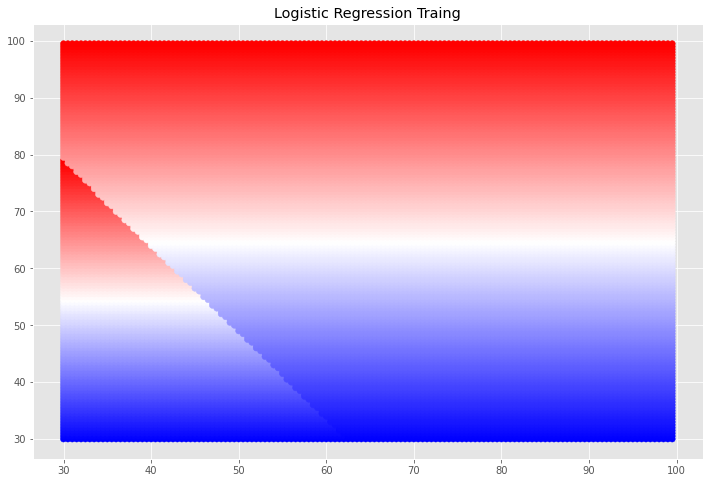

In [143]:
#Plot the obtained classifier
def plot_grid(theta0, theta1, theta2):
  x = np.arange(30,100,0.5)
  y = np.arange(30,100,0.5)
  x_set, y_set = np.meshgrid(x, y)
  classifier = logreg(theta0, theta1, theta2, x_set, y_set)
  x_set = x_set.reshape(-1,1)
  y_set = y_set.reshape(-1,1)
  classifier = classifier.reshape(-1,1)

  x_set0 = x_set[classifier<=0.5]
  x_set1 = x_set[classifier>0.5]
  y_set0 = y_set[classifier<=0.5]
  y_set1 = y_set[classifier>0.5]

  plt.figure(figsize=(12, 8))
  plt.scatter(x_set0, y_set0, c=y_set0, cmap=plt.cm.bwr)
  plt.scatter(x_set1, y_set1, c=y_set1, cmap=plt.cm.bwr)

 # plt.scatter(x, y, c='black')


  plt.title('Logistic Regression Traing')


  #plt.scatter(classifier, c='black')

plot_grid(history['theta0'][-1], history['theta1'][-1], history['theta2'][-1])